In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

database_path = "Resources/hawaii.sqlite"

In [5]:
# Create Engine
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement =Base.classes.measurement


In [9]:
Station =Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
first_row_measurement =session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2c9ea912d90>,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08}

In [12]:
first_row_station =session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2c9eb1abc40>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

import datetime as dt


In [14]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [15]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [16]:
Year_ago = ('2016-8-23')

In [17]:
select = [Measurement.date,Measurement.prcp]
twelve_mths_ago = session.query(*select).\
    filter(func.strftime("%Y-%m-%d",Measurement.date) >= '2016-08-23').\
    order_by(Measurement.date).all()

twelve_mths_ago

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

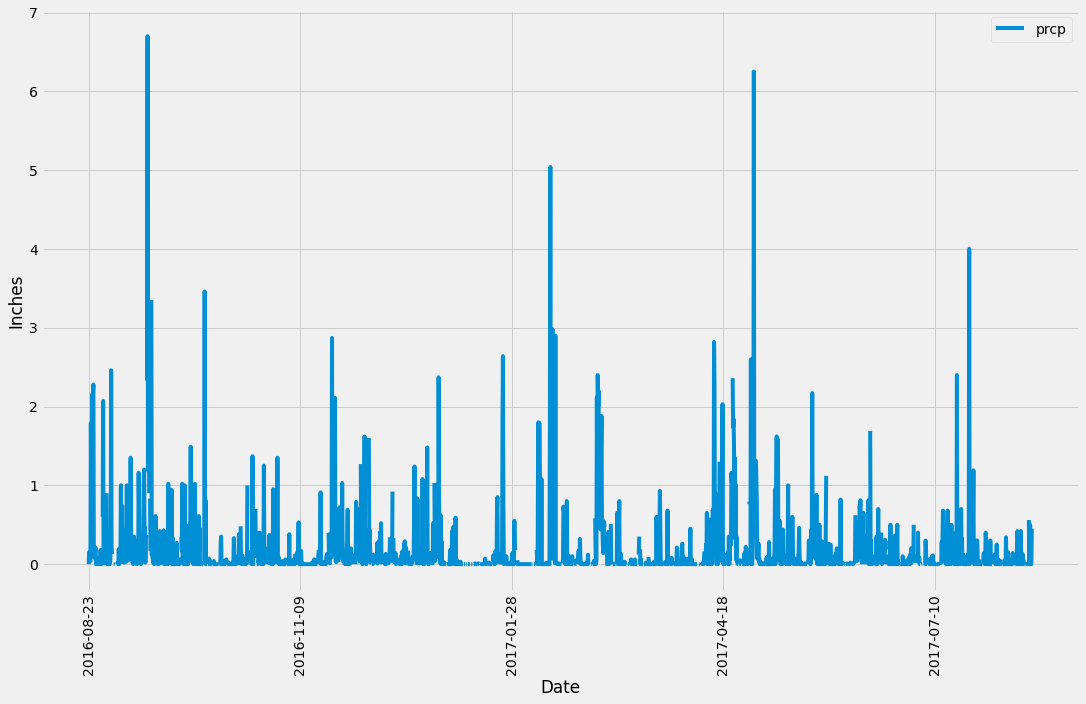

In [18]:
df = pd.DataFrame(twelve_mths_ago, columns=['date', 'prcp'])
df = df.sort_values("date")
df.plot(x='date', y='prcp',rot=90,figsize=(15,10))
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
No_of_station = session.query(func.count(Station.name)).all()
No_of_station

[(9,)]

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

Count_station =session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Count_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
query_lowest_temp = [Measurement.tobs, func.min(Measurement.tobs)]


In [23]:
query_highest_temp = [Measurement.tobs, func.max(Measurement.tobs)]

In [24]:
query_avg_temp =[Measurement.tobs, func.avg(Measurement.tobs)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

lowest_temp =session.query(*query_lowest_temp).\
    filter(Measurement.station == 'USC00519281').scalar()
lowest_temp



54.0

In [ ]:
highest_temp =session.query(*query_highest_temp).\
    filter(Measurement.station == 'USC00519281').scalar()
highest_temp


85.0

In [ ]:
average_temp =session.query(*query_avg_temp).\
    filter(Measurement.station == 'USC00519281').scalar()
average_temp


70.0

In [ ]:
# highest_temp_station =session.query(Measurement.station,func.max(Measurement.tobs)).group_by(Measurement.station).order_by(func.max(Measurement.tobs).desc()).all()
# highest_temp_station

[('USC00519397', 87.0),
 ('USC00517948', 87.0),
 ('USC00511918', 87.0),
 ('USC00519523', 85.0),
 ('USC00519281', 85.0),
 ('USC00514830', 85.0),
 ('USC00513117', 85.0),
 ('USC00516128', 84.0),
 ('USC00518838', 83.0)]

In [ ]:
# lowest_temp_station =session.query(Measurement.station,func.min(Measurement.tobs)).group_by(Measurement.station).order_by(func.min(Measurement.tobs).desc()).all()
# # lowest_temp_station

[('USC00513117', 59.0),
 ('USC00518838', 58.0),
 ('USC00517948', 58.0),
 ('USC00516128', 58.0),
 ('USC00514830', 58.0),
 ('USC00519523', 56.0),
 ('USC00519397', 56.0),
 ('USC00519281', 54.0),
 ('USC00511918', 53.0)]

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Results = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').all()

Results


[('2010-01-01', 70.0),
 ('2010-01-02', 62.0),
 ('2010-01-03', 74.0),
 ('2010-01-04', 75.0),
 ('2010-01-05', 74.0),
 ('2010-01-06', 76.0),
 ('2010-01-07', 69.0),
 ('2010-01-08', 66.0),
 ('2010-01-09', 70.0),
 ('2010-01-10', 75.0),
 ('2010-01-11', 64.0),
 ('2010-01-12', 60.0),
 ('2010-01-13', 61.0),
 ('2010-01-14', 68.0),
 ('2010-01-15', 64.0),
 ('2010-01-16', 66.0),
 ('2010-01-17', 67.0),
 ('2010-01-18', 70.0),
 ('2010-01-19', 67.0),
 ('2010-01-20', 67.0),
 ('2010-01-21', 69.0),
 ('2010-01-22', 60.0),
 ('2010-01-23', 75.0),
 ('2010-01-24', 75.0),
 ('2010-01-25', 65.0),
 ('2010-01-26', 75.0),
 ('2010-01-27', 69.0),
 ('2010-01-28', 67.0),
 ('2010-01-29', 66.0),
 ('2010-01-30', 69.0),
 ('2010-01-31', 72.0),
 ('2010-02-01', 67.0),
 ('2010-02-02', 65.0),
 ('2010-02-03', 64.0),
 ('2010-02-04', 67.0),
 ('2010-02-05', 67.0),
 ('2010-02-06', 68.0),
 ('2010-02-07', 69.0),
 ('2010-02-08', 66.0),
 ('2010-02-09', 69.0),
 ('2010-02-10', 61.0),
 ('2010-02-11', 71.0),
 ('2010-02-12', 70.0),
 ('2010-02-

In [34]:
Highest_temp_df = pd.DataFrame(Results, columns=['date', 'tobs'])
Chosen_twelve_mths_df = Highest_temp_df.loc[Highest_temp_df["date"]>='2016-08-23',["date","tobs"]]
Chosen_twelve_mths_df

,date,tobs
2420,2016-08-23,77.0
2421,2016-08-24,77.0
2422,2016-08-25,80.0
2423,2016-08-26,80.0
2424,2016-08-27,75.0
...,...,...
2767,2017-08-14,77.0
2768,2017-08-15,77.0
2769,2017-08-16,76.0
2770,2017-08-17,76.0


In [35]:
High_temp = Chosen_twelve_mths_df['tobs']

Text(0, 0.5, 'Frequency')

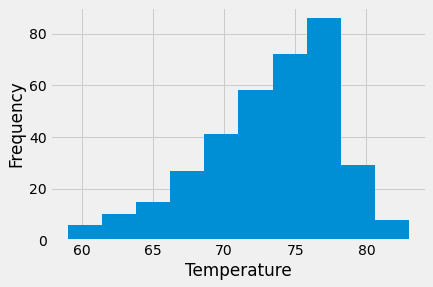

In [36]:
plt.hist(High_temp)
plt.xlabel('Temperature')
plt.ylabel('Frequency')



## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
